In [18]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def convertColorToGrayScale(image, ratio):
    image =  image.astype(np.uint64)
#     img_gray = (image[:,:,0]*ratio[0]+image[:,:,1]*ratio[1]+image[:,:,2]*ratio[2])/3
    img_gray = image @ ratio
    img_gray = img_gray.astype(np.uint8)
    return img_gray

In [ ]:
def main_application():
    #Read an colori mage
    color_image = cv2.imread("/content/cat-551554_640.jpg")
    #Resize an image to (300,300)
    color_image = cv2.resize(color_image, (300,300))
    #Convert image to grayscale
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    #Save resized grayscale image to file gray_image.png
    cv2.imwrite("gray_image.png", gray_image)
    # Add Gaussian noise to gray image
    noise_gray_image = addNoiseToImage(gray_image, 0, 25)
    #Save noisy grayscale image to file noise_gray_image.png
    cv2.imwrite("noise_gray_image.png", noise_gray_image)
    #Perform image denois
    sigma_threshold = 300
    denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
    cv2.imwrite("denoise_image.png", denoise_image)

In [3]:
def addNoiseToImage(image, mean = 0, stddev= 25):
    #uncomment the following three lines of codes for another project
    """noise = np.random.normal(mean, stddev, image.shape)
    noise = np.where(noise > 0 , np.around(noise), 0)
    noise = noise.astype(np.uint8)
    np.save("noise.npy", noise)"""
    noise = np.load("noise.npy")
    # Add noise to image
    noisy_img = cv2.add(image, noise)
    return noisy_img

In [5]:
color_image = cv2.imread("cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_image = addNoiseToImage(gray_image)
avg_org = np.sum(gray_image)/(gray_image.shape[0]*gray_image.shape[1])
avg_noise = np.sum(noise_image)/(gray_image.shape[0]*gray_image.shape[1])
print("avg_org: ", round(avg_org,2))
print("avg_noise: ", round(avg_noise,2))

avg_org:  66.33
avg_noise:  76.23


In [28]:
def perform_image_denoise(noise_image, sigma_threshold):
    # Calculate U (u), (s) and V (vh)
    u, s, vh = np.linalg.svd(noise_image)
    # Remove sigma values below sigma_threshold
    s_cleaned = np.where(s<sigma_threshold,0,s)
    s_cleaned = np.diag(s_cleaned)
    img_denoised = u@s_cleaned@vh
    return img_denoised

In [30]:
def compute_rms_error(matrix1, matrix2):
    matrix = (matrix1-matrix2)**2
    result = np.mean(matrix)
    result = math.sqrt(result)
    return result

In [31]:
def compute_cosine_similarity(matrix1, matrix2):
    matrix1 = matrix1.flatten()
    matrix1 = matrix1/np.linalg.norm(matrix1)
    matrix2 = matrix2.flatten()
    matrix2 = matrix2/np.linalg.norm(matrix2)
    result = matrix1.dot(matrix2)
    return result

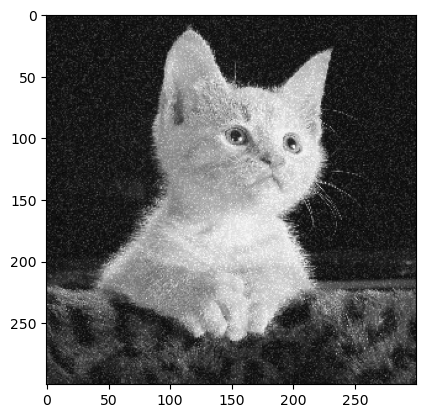

rms 17.28


In [45]:
#Read an colori mage
color_image = cv2.imread("cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)

sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
plt.imshow(denoise_image,cmap='gray')
plt.show()
similarity = compute_rms_error(denoise_image,gray_image)
print("rms", round(similarity,2))

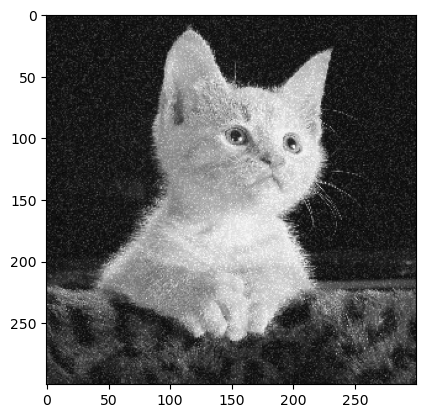

similarity 0.9895


In [40]:
#Read an colori mage
color_image = cv2.imread("cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)
#Perform image denois
sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
plt.imshow(denoise_image,cmap='gray')
plt.show()
similarity = compute_cosine_similarity(denoise_image,gray_image)
print("similarity", round(similarity,4))

In [37]:
def find_best_sigma_image_denoise(noise_image, orignial_image, metric = 0, sigma_range= 1000):
    # Calculate U (u), (s) and V (vh)
    u, s, vh = np.linalg.svd(noise_image)
    # Select the best threshold that has mininum RMS error
    evaluation_history = []
    for i in range(1, sigma_range):
        # Remove sigma values below sigma_threshold
        s_cleaned = np.where(s<i,0,s)
        s_cleaned = np.diag(s_cleaned)
        img_denoised = u@s_cleaned@vh
        if (metric == 0):
            similarity = compute_cosine_similarity(orignial_image, img_denoised)
            evaluation_history.append(similarity)
        else:
            error = compute_rms_error(orignial_image, img_denoised)
            evaluation_history.append(error)
    if metric == 0:
        max_list = max(evaluation_history)
        best_index = evaluation_history.index(max_list)
    else:
        min_list = min(evaluation_history)
        best_index = evaluation_history.index(min_list)
    return best_index, evaluation_history


In [41]:
def find_best_sigma_based_cosine():
    #Read an colori mage
    color_image = cv2.imread("cat.jpeg")
    #Resize an image to (300,300)
    color_image = cv2.resize(color_image, (300,300))
    #Convert image to grayscale
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    #Save resized grayscale image to file gray_image.png
    cv2.imwrite("gray_image.png", gray_image)
    # Add Gaussian noise to gray image
    noise_gray_image = addNoiseToImage(gray_image, 0, 25)
    #Save noisy grayscale image to file noise_gray_image.png
    cv2.imwrite("noise_gray_image.png", noise_gray_image)
    metric = 0 # for cosine similarity
    best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image,
    gray_image, metric)
    print("best sigma: ", best_threshold)
find_best_sigma_based_cosine()

best sigma:  504


In [46]:
def find_best_sigma_based_cosine():
    #Read an colori mage
    color_image = cv2.imread("cat.jpeg")
    #Resize an image to (300,300)
    color_image = cv2.resize(color_image, (300,300))
    #Convert image to grayscale
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    #Save resized grayscale image to file gray_image.png
    cv2.imwrite("gray_image.png", gray_image)
    # Add Gaussian noise to gray image
    noise_gray_image = addNoiseToImage(gray_image, 0, 25)
    #Save noisy grayscale image to file noise_gray_image.png
    cv2.imwrite("noise_gray_image.png", noise_gray_image)
    metric = 1 # for RMSE
    best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image,
    gray_image, metric)
    print("best sigma: ", best_threshold)
find_best_sigma_based_cosine()

best sigma:  546


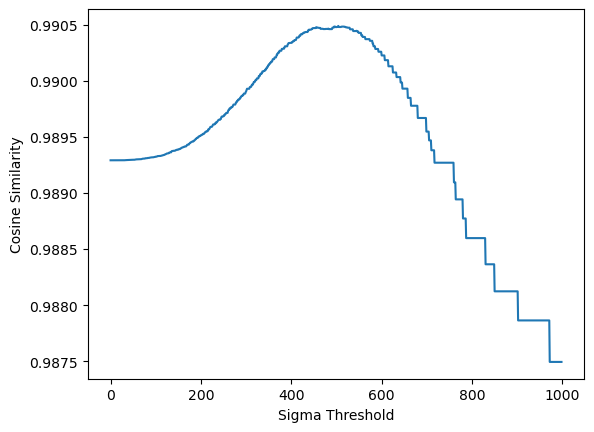

In [49]:
def plot_chart_based_cosine():
    #Read an colori mage
    color_image = cv2.imread("cat.jpeg")
    #Resize an image to (300,300)
    color_image = cv2.resize(color_image, (300,300))
    #Convert image to grayscale
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    #Save resized grayscale image to file gray_image.png
    cv2.imwrite("gray_image.png", gray_image)
    # Add Gaussian noise to gray image
    noise_gray_image = addNoiseToImage(gray_image, 0, 25)
    #Save noisy grayscale image to file noise_gray_image.png
    cv2.imwrite("noise_gray_image.png", noise_gray_image)
    metric = 0 # for cosine similarity
    best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image,
    gray_image, metric)
    plt.plot(evaluation_history)
    plt.xlabel("Sigma Threshold")
    plt.ylabel("Cosine Similarity")
    plt.show()
plot_chart_based_cosine()

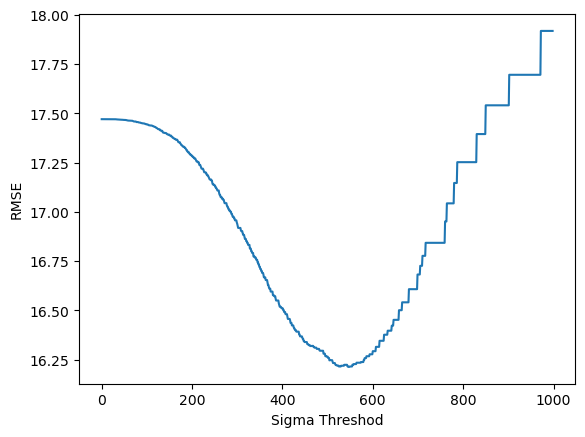

In [51]:
def plot_chart_based_rmse():
    #Read an colori mage
    color_image = cv2.imread("cat.jpeg")
    #Resize an image to (300,300)
    color_image = cv2.resize(color_image, (300,300))
    #Convert image to grayscale
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    #Save resized grayscale image to file gray_image.png
    cv2.imwrite("gray_image.png", gray_image)
    # Add Gaussian noise to gray image
    noise_gray_image = addNoiseToImage(gray_image, 0, 25)
    #Save noisy grayscale image to file noise_gray_image.png
    cv2.imwrite("noise_gray_image.png", noise_gray_image)
    metric = 1 # for cosine similarity
    best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image,
    gray_image, metric)
    plt.plot(evaluation_history)
    plt.xlabel("Sigma Threshod")
    plt.ylabel("RMSE")
    plt.show()
plot_chart_based_rmse()